In [2]:
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt              


In [6]:
data=pd.read_csv('Social_Network_Ads.csv')

In [7]:
data.head()  # this shows the preview of the data and will show the first five rows of the data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
x=data.iloc[:,2:4].values   #.value will convert it into numpy arrays and the iloc meaning is we are takig all the rows and the columns from 2 to 4 

In [14]:
x.shape

(400, 2)

In [17]:
y=data.iloc[:,-1].values

In [18]:
y.shape

(400,)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train.shape

(320, 2)

In [22]:
x_test.shape

(80, 2)

In [23]:
y_test.shape

(80,)

In [24]:
y_train.shape

(320,)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:

x_train=scaler.fit_transform(x_train)
x_train

array([[-0.26669851,  0.1231177 ],
       [ 1.62352349,  1.70499363],
       [-0.64474291,  0.24250456],
       [-0.73925401,  0.36189143],
       [ 0.39487919, -0.41412318],
       [-0.64474291, -1.01105749],
       [-1.11729841,  0.36189143],
       [ 0.30036809,  0.36189143],
       [ 0.20585699, -0.62305019],
       [-0.64474291,  1.49606662],
       [-1.02278731, -0.32458303],
       [-0.26669851, -0.4439699 ],
       [ 0.30036809, -0.2648896 ],
       [ 0.86743469, -0.74243705],
       [-1.68436501, -0.56335676],
       [ 0.39487919,  0.33204471],
       [ 1.71803459,  1.94376736],
       [-1.21180951,  0.66035858],
       [ 2.00156789, -1.16029107],
       [-0.73925401, -0.17534945],
       [ 0.11134589, -0.77228377],
       [-0.17218741,  1.73484035],
       [-0.26669851, -0.23504289],
       [ 0.30036809,  0.1231177 ],
       [-0.55023181,  1.46621991],
       [-1.02278731, -0.41412318],
       [ 1.81254569, -1.04090421],
       [-0.07767631,  0.18281113],
       [-1.68436501,

In [28]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-9.88923374e-02, -4.03849390e-01],
       [ 1.25180174e-03, -5.74339898e-01],
       [-1.99036477e-01, -1.76528713e-01],
       [-6.99757172e-01,  2.78112641e-01],
       [ 4.01828358e-01, -1.48113629e-01],
       [-6.99757172e-01,  1.64203670e+00],
       [ 1.70370217e+00,  7.61169079e-01],
       [ 1.01395941e-01, -7.44830406e-01],
       [ 9.02549054e-01, -1.54045277e+00],
       [ 1.10283733e+00,  1.52837636e+00],
       [ 8.02404915e-01, -1.28471701e+00],
       [-1.10033373e+00,  1.92867387e-01],
       [-5.99613033e-01, -9.12834593e-02],
       [-9.00045451e-01,  2.78112641e-01],
       [-1.99036477e-01, -5.45924813e-01],
       [ 1.25180174e-03, -7.16415321e-01],
       [ 1.00269319e+00, -7.44830406e-01],
       [ 3.01684219e-01,  1.84094229e+00],
       [ 2.01540080e-01, -1.76528713e-01],
       [ 3.01684219e-01, -5.17509729e-01],
       [-1.99036477e-01, -1.11422651e+00],
       [-1.20047787e+00, -1.25630193e+00],
       [ 5.01972498e-01, -3.47019221e-01],
       [ 5.

CALCULATING THE VALUE OF K 

In [30]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [31]:
k=17

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)


In [34]:
#train our model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [35]:
y_pred=knn.predict(x_test)

In [36]:
y_pred.shape

(80,)

In [37]:
y_test.shape

(80,)

In [38]:
from sklearn.metrics import  accuracy_score  
accuracy_score(y_test,y_pred)

0.9125

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [ 4, 24]], dtype=int64)

Calculating  K on the basis of hit and trial method 

In [42]:
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
    

In [43]:
accuracy

[0.8875,
 0.85,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

In [44]:
len(accuracy)

25

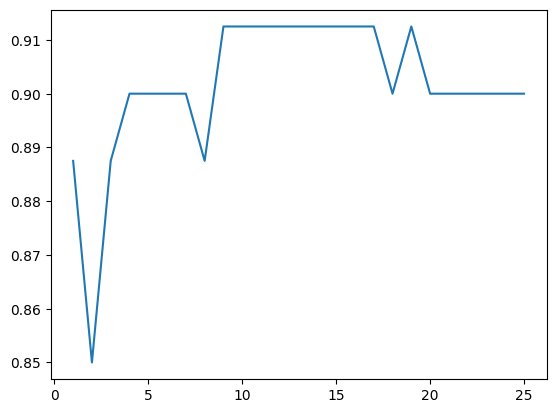

In [45]:
plt.plot(range(1,26),accuracy)